In [4]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\hp\Downloads\archive (5)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
    print("Dataset loaded successfully!")
    print(df.head()) # Display the first 5 rows
    print(df.info()) # Get a summary of the dataframe
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Make sure it's in the same directory as your notebook.")

Dataset loaded successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [6]:
# Drop customerID column as it's not useful for prediction
df = df.drop('customerID', axis=1)

# Inspect TotalCharges: it's an object type, likely due to some blank spaces or non-numeric values
print("\nUnique values in 'TotalCharges' before cleaning:", df['TotalCharges'].unique())

# Convert 'TotalCharges' to numeric, coercing errors (non-numeric values) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in 'TotalCharges' after conversion
print("\nMissing values in 'TotalCharges' after conversion:", df['TotalCharges'].isnull().sum())

# Handle missing values: For 'TotalCharges', a common approach is to fill with the mean/median or drop rows.
# Since it's a small number of missing values (usually around 11), dropping them is often acceptable.
df.dropna(inplace=True)

# Convert Churn column to numerical (0 for No, 1 for Yes)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
print("\n'Churn' column unique values after mapping:", df['Churn'].unique())
print(df.info()) # Check data types again


Unique values in 'TotalCharges' before cleaning: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Missing values in 'TotalCharges' after conversion: 11

'Churn' column unique values after mapping: [0 1]
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       703

In [7]:
# Identify categorical columns (excluding 'Churn' and numerical ones)
categorical_cols = df.select_dtypes(include='object').columns
print("\nCategorical columns to encode:", categorical_cols)

# Apply One-Hot Encoding using pd.get_dummies
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

print("\nDataFrame head after One-Hot Encoding:")
print(df.head())
print(df.info())


Categorical columns to encode: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

DataFrame head after One-Hot Encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        Fals

In [8]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (exclude 'Churn' as it's our target)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Apply scaling to the identified numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataFrame head after Feature Scaling:")
print(df.head())


DataFrame head after Feature Scaling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0 -1.280248       -1.161694     -0.994194      0        False   
1              0  0.064303       -0.260878     -0.173740      0         True   
2              0 -1.239504       -0.363923     -0.959649      1         True   
3              0  0.512486       -0.747850     -0.195248      0         True   
4              0 -1.239504        0.196178     -0.940457      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                


Churn Distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


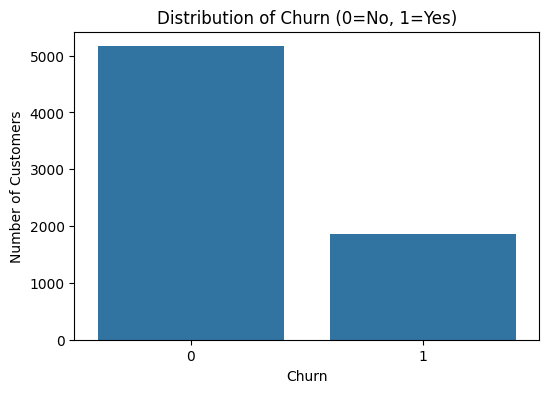

Churn Rate: 26.58%


In [9]:
# Churn distribution
churn_counts = df['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (0=No, 1=Yes)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Calculate churn rate
churn_rate = churn_counts[1] / (churn_counts[0] + churn_counts[1]) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

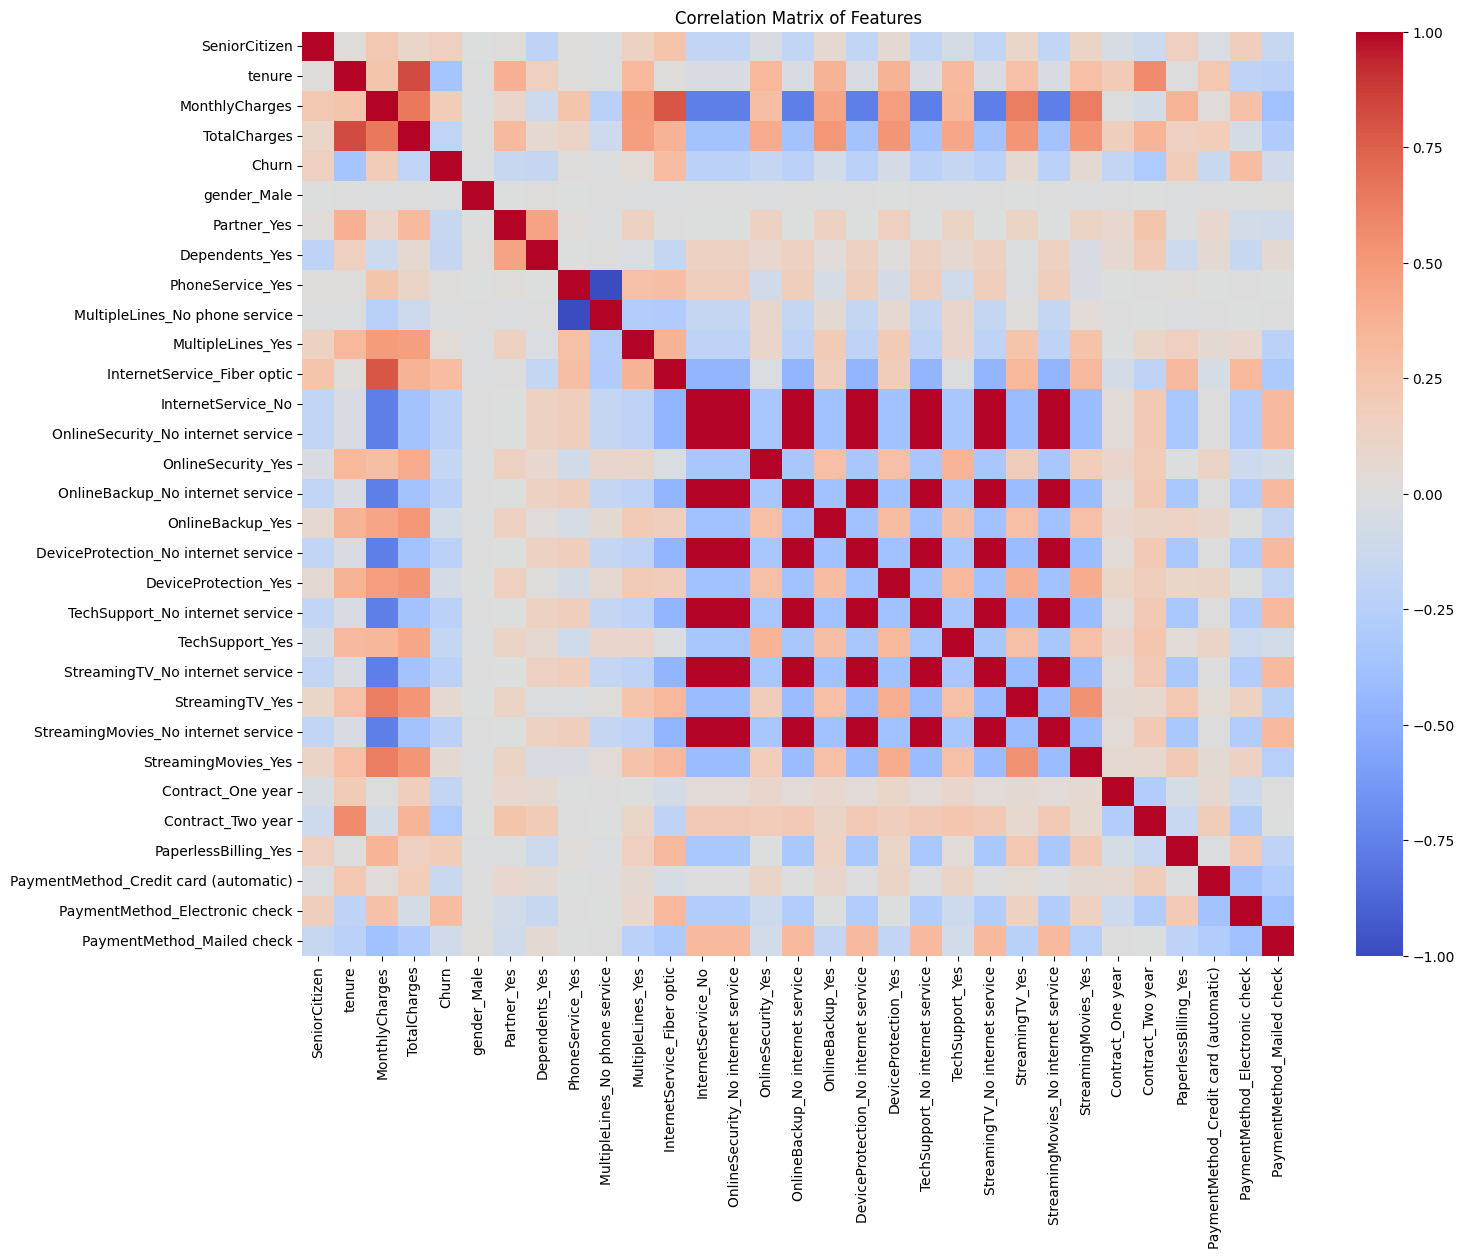


Top 10 features correlated with Churn:
Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService_Yes                  0.011691
gender_Male                      -0.008545
Name: Churn, dtype: float64


In [10]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f") # annot=True for values, False for cleaner look
plt.title('Correlation Matrix of Features')
plt.show()

# Specific correlations with Churn
print("\nTop 10 features correlated with Churn:")
print(df.corr()['Churn'].sort_values(ascending=False).head(11)) # Get top 11 to exclude Churn itself

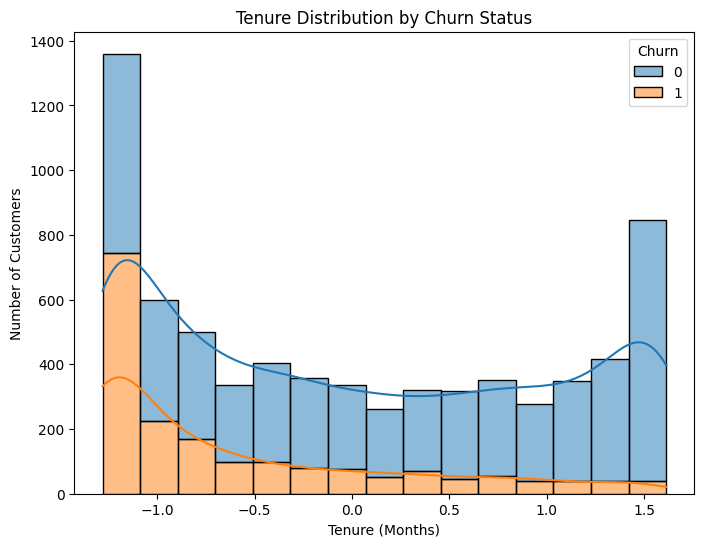

In [11]:
# Example: Tenure vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(x='tenure', hue='Churn', data=df, kde=True, multiple='stack')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()
# Observation: Shorter tenure customers churn more often.

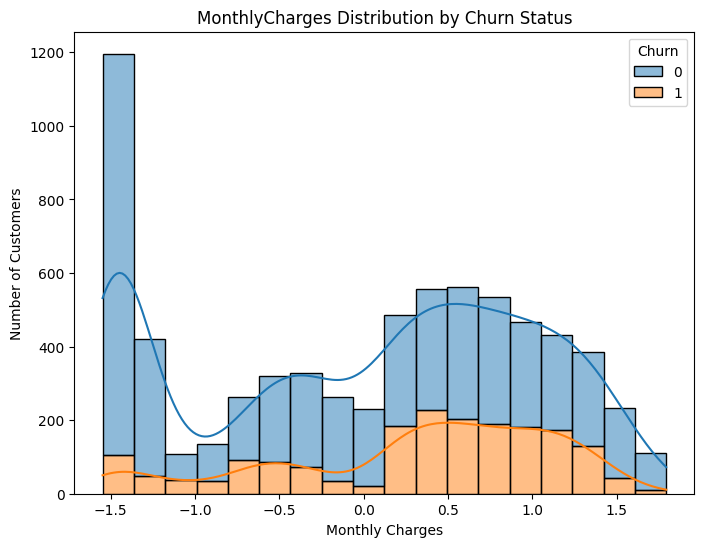

In [12]:
# Example: MonthlyCharges vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(x='MonthlyCharges', hue='Churn', data=df, kde=True, multiple='stack')
plt.title('MonthlyCharges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()
# Observation: Higher monthly charges seem to be associated with higher churn.

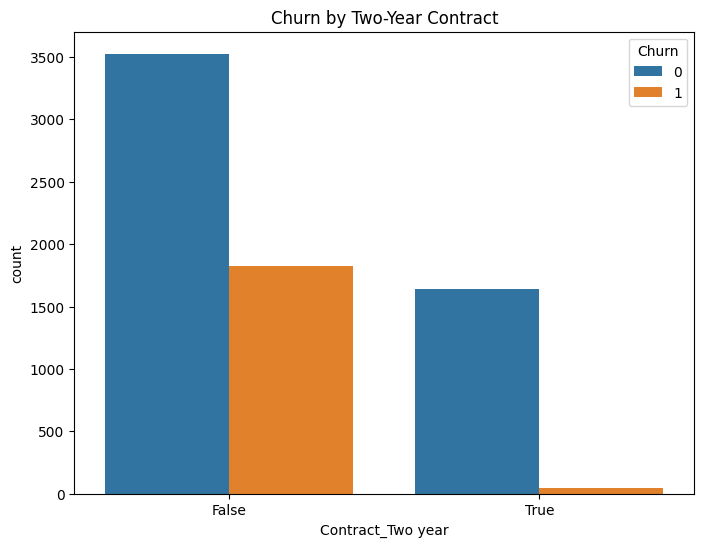

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract_Two year', hue='Churn', data=df) # 0 means not Two year contract, 1 means Two year contract
plt.title('Churn by Two-Year Contract')
plt.show()
# Observation: Customers with a two-year contract churn less.

In [14]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1) # All columns except 'Churn'
y = df['Churn'] # Only the 'Churn' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Churn distribution in y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Churn distribution in y_test:\n{y_test.value_counts(normalize=True)}")

Shape of X_train: (5625, 30)
Shape of X_test: (1407, 30)
Churn distribution in y_train:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Churn distribution in y_test:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



--- Training Logistic Regression ---
Accuracy: 0.8031
Precision: 0.6474
Recall: 0.5695
F1-Score: 0.6060
ROC-AUC: 0.8362

Confusion Matrix:
[[917 116]
 [161 213]]


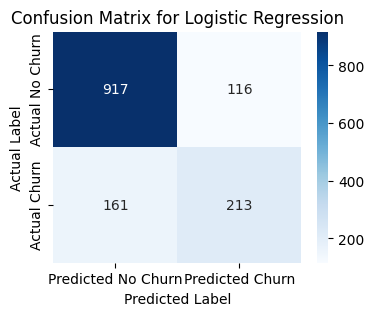

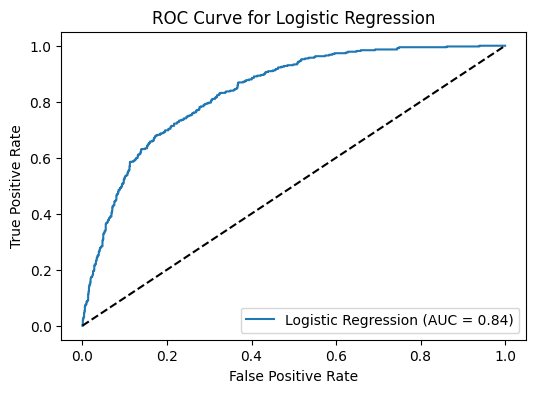


--- Training Decision Tree ---
Accuracy: 0.7193
Precision: 0.4717
Recall: 0.4679
F1-Score: 0.4698
ROC-AUC: 0.6388

Confusion Matrix:
[[837 196]
 [199 175]]


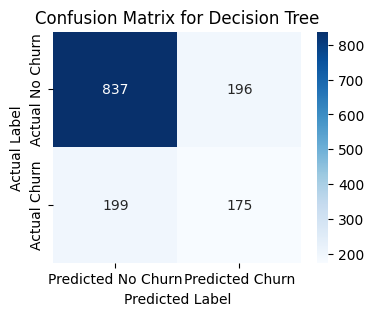

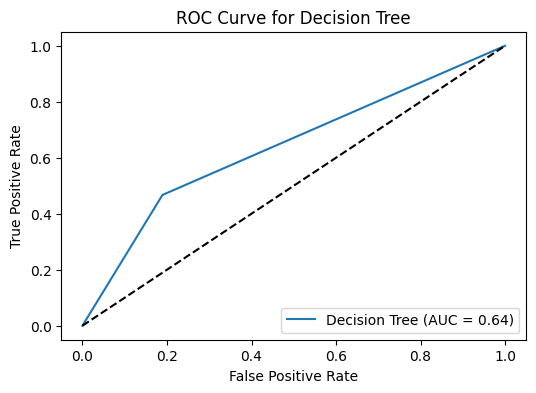


--- Training Random Forest ---
Accuracy: 0.7896
Precision: 0.6258
Recall: 0.5187
F1-Score: 0.5673
ROC-AUC: 0.8163

Confusion Matrix:
[[917 116]
 [180 194]]


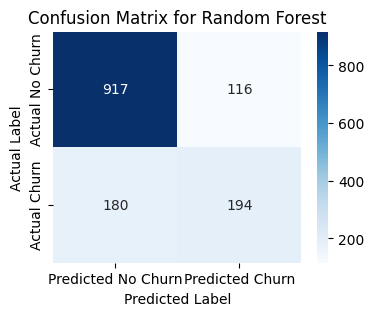

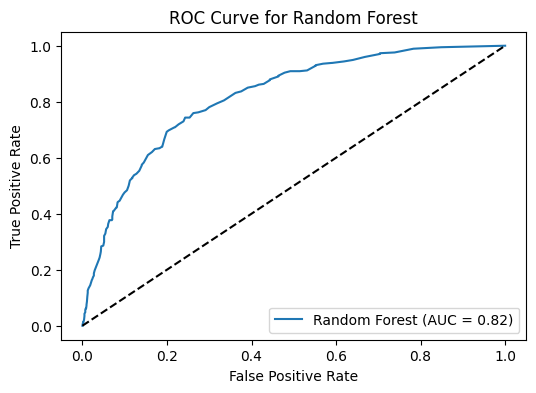


--- Training XGBoost ---
Accuracy: 0.7783
Precision: 0.5891
Recall: 0.5481
F1-Score: 0.5679
ROC-AUC: 0.8197

Confusion Matrix:
[[890 143]
 [169 205]]


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


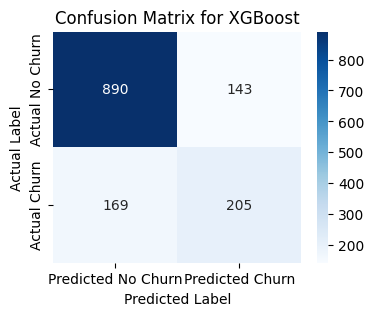

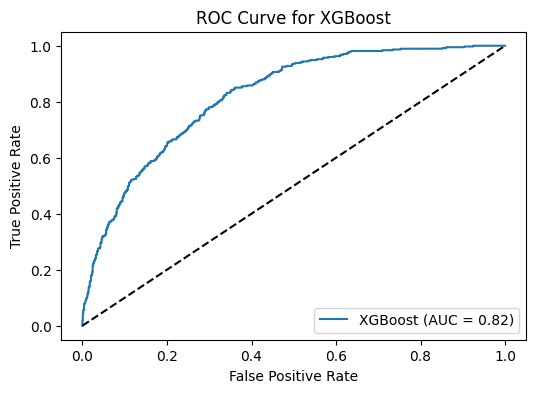

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # You might need to pip install xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- Training {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Churn', 'Predicted Churn'],
                yticklabels=['Actual No Churn', 'Actual Churn'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--') # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# 1. Logistic Regression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for smaller datasets
train_and_evaluate_model(log_reg_model, X_train, y_train, X_test, y_test, "Logistic Regression")

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 4. XGBoost (make sure you've installed it: pip install xgboost)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
train_and_evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")


--- Starting Grid Search for Random Forest ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC score on validation sets: 0.8429

--- Training Optimized Random Forest ---
Accuracy: 0.7953
Precision: 0.6483
Recall: 0.5027
F1-Score: 0.5663
ROC-AUC: 0.8348

Confusion Matrix:
[[931 102]
 [186 188]]


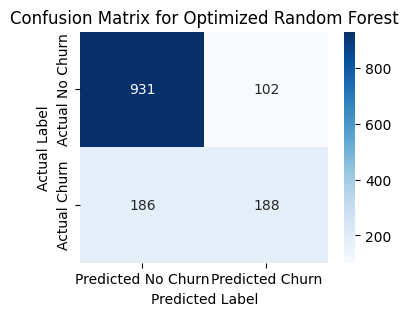

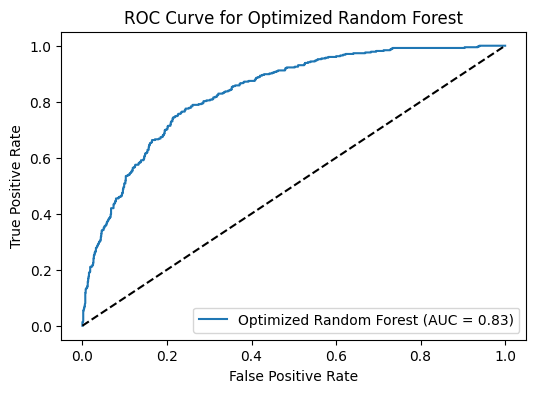

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200], # Number of trees in the forest
    'max_depth': [10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5] # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1, # Use all available CPU cores
                           verbose=1) # Print progress messages

print("\n--- Starting Grid Search for Random Forest ---")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best ROC-AUC score on validation sets: {grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
train_and_evaluate_model(best_rf_model, X_train, y_train, X_test, y_test, "Optimized Random Forest")

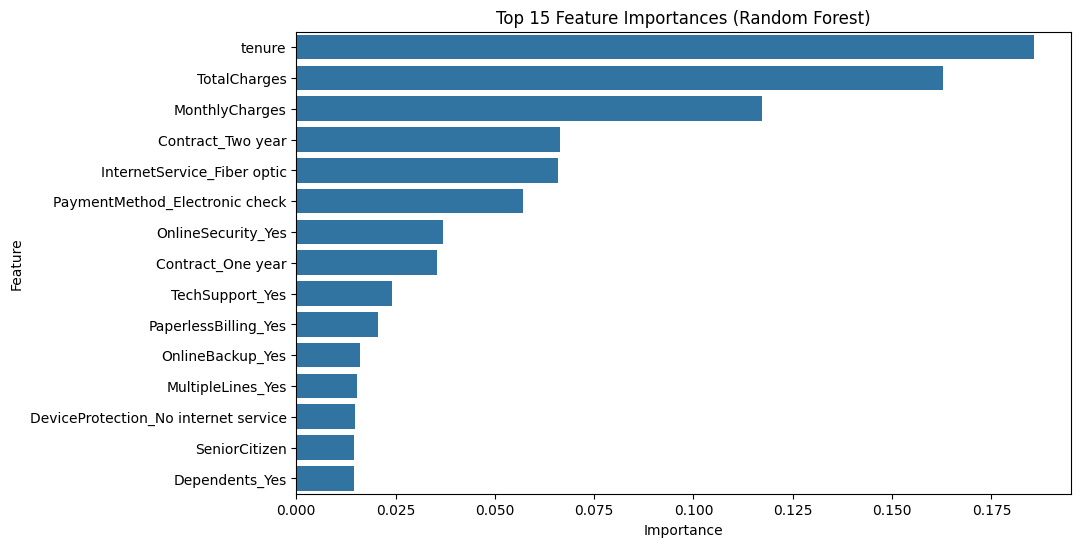


Top 15 Feature Importances:
tenure                                  0.185816
TotalCharges                            0.162933
MonthlyCharges                          0.117282
Contract_Two year                       0.066351
InternetService_Fiber optic             0.065995
PaymentMethod_Electronic check          0.057161
OnlineSecurity_Yes                      0.036916
Contract_One year                       0.035439
TechSupport_Yes                         0.024156
PaperlessBilling_Yes                    0.020537
OnlineBackup_Yes                        0.016064
MultipleLines_Yes                       0.015335
DeviceProtection_No internet service    0.014885
SeniorCitizen                           0.014648
Dependents_Yes                          0.014635
dtype: float64


In [22]:

if 'best_rf_model' in locals(): # Check if best_rf_model was created
    feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
    sorted_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_importances.head(15).values, y=sorted_importances.head(15).index)
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    print("\nTop 15 Feature Importances:")
    print(sorted_importances.head(15))

In [23]:
import joblib
# Choose your best performing model, for example, the optimized Random Forest
final_model = best_rf_model # Or xgb_model if it performed better

# Save the model
joblib.dump(final_model, 'churn_prediction_model.pkl')
print("\nModel saved as 'churn_prediction_model.pkl'")

# You'll also need to save the scaler and the list of columns used for training
# to ensure new data is preprocessed exactly the same way.
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')
print("Scaler and feature list saved.")


Model saved as 'churn_prediction_model.pkl'
Scaler and feature list saved.


In [24]:

sample_input = X_test.iloc[0:1].copy() # Take first row of test features
actual_churn_status = y_test.iloc[0]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Assuming these were the scaled features

original_values = pd.DataFrame(loaded_scaler.inverse_transform(sample_input[numerical_features]), 
                              columns=numerical_features)

# Modify the values we want to change
original_values['tenure'] = 1  # Change tenure to 1 month
original_values['MonthlyCharges'] = 70  # Change monthly charges to 70

# Scale the modified values back
scaled_values = loaded_scaler.transform(original_values)

# Update the sample_input with the new scaled values
for i, col in enumerate(numerical_features):
    sample_input[col] = scaled_values[0][i]

if 'Contract_One year' in sample_input.columns: sample_input['Contract_One year'] = 0
if 'Contract_Two year' in sample_input.columns: sample_input['Contract_Two year'] = 0

churn_probability = loaded_model.predict_proba(sample_input)[:, 1][0]
churn_prediction = loaded_model.predict(sample_input)[0]

print(f"\n--- Prediction for a Sample Customer ---")
print(f"Sample Customer's actual churn status (from test set): {actual_churn_status}")
print(f"Predicted Churn Probability: {churn_probability:.4f}")
print(f"Predicted Churn (0=No, 1=Yes): {churn_prediction}")

if churn_prediction == 1:
    print("This customer is predicted to churn. Take proactive retention actions!")
else:
    print("This customer is predicted to stay.")

NameError: name 'loaded_scaler' is not defined

In [25]:

df_for_bi = pd.read_csv(r"C:\Users\hp\Downloads\archive (5)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_for_bi = df_for_bi.drop('customerID', axis=1)
df_for_bi['TotalCharges'] = pd.to_numeric(df_for_bi['TotalCharges'], errors='coerce')
df_for_bi.dropna(inplace=True)
df_for_bi['Churn'] = df_for_bi['Churn'].map({'No': 0, 'Yes': 1})
df_for_bi.to_csv('telco_churn_data_for_bi.csv', index=False)
print("\nData exported to 'telco_churn_data_for_bi.csv' for Power BI/Tableau.")


Data exported to 'telco_churn_data_for_bi.csv' for Power BI/Tableau.
